In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

In [18]:
df = pd.read_csv('forestfire.csv')
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,2,4,feb,thu,92.4,43.7,634.0,11.0,26.5,37,4.7,0.0,34.85
1,9,5,mar,sat,91.4,1.1,521.3,8.0,29.5,50,7.2,0.0,0.00
2,4,6,sep,sun,90.0,15.2,735.5,8.3,20.5,45,5.6,0.0,6.00
3,3,4,mar,sun,93.3,39.2,578.2,9.8,14.0,30,4.3,0.0,8.19
4,8,6,mar,fri,89.6,23.2,311.1,5.9,20.5,17,4.9,1.1,0.00
5,7,4,dec,thu,92.2,15.7,85.6,6.1,21.3,49,6.2,0.0,50.65
6,4,3,sep,tue,93.8,1.1,626.3,6.2,22.8,51,2.2,0.0,0.00
7,4,4,aug,fri,90.7,47.7,117.8,11.6,24.0,45,3.6,0.0,0.00
8,4,4,jan,tue,91.3,64.0,456.4,6.8,23.7,35,4.9,0.0,0.00
9,4,3,sep,mon,23.2,43.4,672.1,4.9,21.8,40,7.2,0.0,146.78


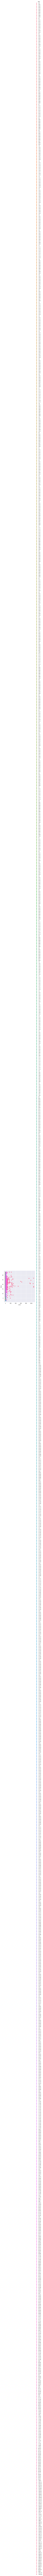

In [ ]:
sns.FacetGrid(df,hue='area',height=5).map(plt.scatter,'area','temp').add_legend()

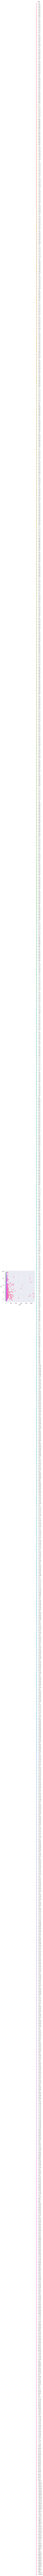

In [ ]:
sns.FacetGrid(df,hue='area',height=5).map(plt.scatter,'area','RH').add_legend()

In [19]:
df['size_category'] = np.where(df['area']>14, '1', '0')
df['size_category']= pd.to_numeric(df['size_category'])
df.tail(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
4990,4,4,jul,sun,92.8,1.1,706.5,6.5,26.0,40,4.9,0.0,5.81,0
4991,9,4,feb,sat,90.9,72.8,533.5,5.7,15.7,28,5.8,0.0,0.00,0
4992,4,2,aug,thu,94.3,42.7,675.2,4.9,24.9,22,5.2,0.0,2.73,0
4993,5,4,aug,sun,85.1,1.1,522.5,0.0,22.9,18,6.7,0.0,0.00,0
4994,4,4,sep,tue,86.7,52.8,612.5,4.7,28.3,21,5.5,0.0,0.97,0
4995,1,4,aug,wed,91.5,1.1,622.1,6.2,27.8,30,4.0,0.0,1.75,0
4996,1,2,aug,sat,91.0,76.4,506.5,7.8,12.1,48,9.4,0.0,214.33,1
4997,3,4,aug,thu,91.8,61.7,423.1,7.7,29.9,39,6.4,0.0,3.25,0
4998,9,6,sep,sun,92.3,57.4,506.3,5.5,22.4,55,8.9,0.0,4.39,0
4999,4,4,sep,thu,91.7,55.1,656.4,8.0,19.6,32,5.9,0.0,0.00,0


In [20]:
df.drop(columns={'X','Y','month','day','FFMC','DMC','DC','ISI','area','wind','rain'}, inplace=True, axis=1)
df.head()

,temp,RH,size_category
0,26.5,37,1
1,29.5,50,0
2,20.5,45,0
3,14.0,30,0
4,20.5,17,0


In [21]:
features = df.drop(['size_category'], axis = 1)
labels = df['size_category'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 42)

In [22]:
# fitting scaler
sc_features = StandardScaler()
# transforming features
X_test = sc_features.fit_transform(X_test)
X_train = sc_features.transform(X_train)
# features
X_test = pd.DataFrame(X_test, columns = features.columns)
X_train = pd.DataFrame(X_train, columns = features.columns)
# labels
y_test = pd.DataFrame(y_test, columns = ['size_category'])
y_train = pd.DataFrame(y_train, columns = ['size_category'])
X_train.head()

,temp,RH
0,-0.549440,-0.652937
1,-0.101817,0.640277
2,-0.687171,-0.380681
3,-0.842117,-0.312617
4,1.103322,-0.448745


In [23]:
model = Sequential()
# input layer + 1st hidden layer
model.add(Dense(6, input_dim=2, activation='relu'))
# 2nd hidden layer
model.add(Dense(6, activation='relu'))
# output layer
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 18        
                                                                 
 dense_5 (Dense)             (None, 6)                 42        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile Model
model.compile(optimizer = 'adam', metrics=['accuracy'], loss ='binary_crossentropy')
# Train Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 10, epochs = 100)

Epoch 1/100
400/400 [==============================] - 1s 2ms/step - loss: 1.5479 - accuracy: 0.8805 - val_loss: 1.4345 - val_accuracy: 0.9070
Epoch 2/100
400/400 [==============================] - 0s 1ms/step - loss: 1.4636 - accuracy: 0.8827 - val_loss: 1.2925 - val_accuracy: 0.9070
Epoch 3/100
400/400 [==============================] - 1s 3ms/step - loss: 1.3322 - accuracy: 0.8725 - val_loss: 1.1102 - val_accuracy: 0.9070
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 1.2955 - accuracy: 0.8658 - val_loss: 1.0266 - val_accuracy: 0.9070
Epoch 5/100
400/400 [==============================] - 1s 3ms/step - loss: 1.2786 - accuracy: 0.8597 - val_loss: 1.0173 - val_accuracy: 0.9070
Epoch 6/100
400/400 [==============================] - 1s 3ms/step - loss: 1.2122 - accuracy: 0.8495 - val_loss: 0.5755 - val_accuracy: 0.9020
Epoch 7/100
400/400 [==============================] - 1s 3ms/step - loss: 0.8050 - accuracy: 0.8310 - val_loss: 0.3621 - val_accuracy: 0.9020

In [25]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.887, Valid: 0.907


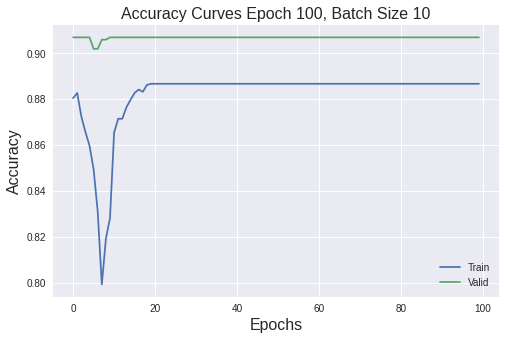

In [27]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100, Batch Size 10', fontsize=16)
plt.show()

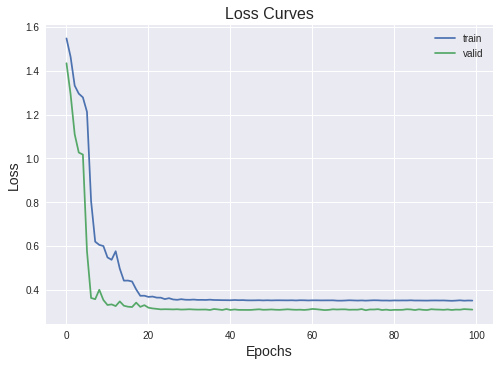

In [28]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss Curves', fontsize=16)
plt.show()

In [38]:
model.save('Final_Model.h5')

In [29]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
8/8 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.9070
test loss, test acc: [0.3089802861213684, 0.9070000052452087]


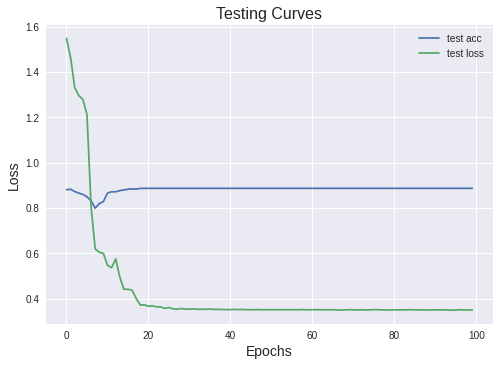

In [35]:
plt.plot(history.history['accuracy'], label='test acc')
plt.plot(history.history['loss'], label='test loss')
plt.legend()
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Testing Curves', fontsize=16)
plt.show()